## Task 4: Exploratory  Data Analysis

### Aim: To perform EDA on terrrorism dataset.

Data can be found at: https://bit.ly/2TK5Xn5

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df=pd.read_csv("globalterrorismdb.csv",encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
#considering the required columns only
df=df[['iyear','imonth','iday','country','provstate','region','city','latitude','longitude','attacktype1_txt','nkill',
               'nwound','target1','summary','gname','targtype1_txt','weaptype1_txt','motive']]

In [4]:
df.head()

,iyear,imonth,iday,country,provstate,region,city,latitude,longitude,attacktype1_txt,nkill,nwound,target1,summary,gname,targtype1_txt,weaptype1_txt,motive
0,1970,7,2,58,NaN,2,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,130,Federal,1,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,160,Tarlac,5,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,78,Attica,8,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,101,Fukouka,4,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country          181691 non-null  int64  
 4   provstate        181270 non-null  object 
 5   region           181691 non-null  int64  
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   attacktype1_txt  181691 non-null  object 
 10  nkill            171378 non-null  float64
 11  nwound           165380 non-null  float64
 12  target1          181055 non-null  object 
 13  summary          115562 non-null  object 
 14  gname            181691 non-null  object 
 15  targtype1_txt    181691 non-null  object 
 16  weaptype1_txt    181691 non-null  obje

In [6]:
#descriptive statistics
df.describe()

,iyear,imonth,iday,country,region,latitude,longitude,nkill,nwound
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,131.968501,7.160938,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,112.414535,2.933408,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,78.000000,5.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,98.000000,6.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,160.000000,10.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1004.000000,12.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [7]:
#checking for null values
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country                 0
provstate             421
region                  0
city                  434
latitude             4556
longitude            4557
attacktype1_txt         0
nkill               10313
nwound              16311
target1               636
summary             66129
gname                   0
targtype1_txt           0
weaptype1_txt           0
motive             131130
dtype: int64

In [8]:
#correlation analysis
df.corr()

,iyear,imonth,iday,country,region,latitude,longitude,nkill,nwound
iyear,1.000000,0.000139,0.018254,-0.135023,0.401384,0.166933,0.003917,0.015341,0.015273
imonth,0.000139,1.000000,0.005497,-0.006305,-0.002999,-0.015978,-0.003880,0.003463,0.002938
iday,0.018254,0.005497,1.000000,0.003468,0.009710,0.003423,-0.002285,-0.003693,-0.001268
country,-0.135023,-0.006305,0.003468,1.000000,0.148597,0.178567,-0.000269,-0.014902,-0.003530
region,0.401384,-0.002999,0.009710,0.148597,1.000000,0.309274,0.004351,0.042062,0.020472
latitude,0.166933,-0.015978,0.003423,0.178567,0.309274,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,-0.000269,0.004351,0.001463,1.000000,-0.000562,0.000223
nkill,0.015341,0.003463,-0.003693,-0.014902,0.042062,-0.018124,-0.000562,1.000000,0.534375
nwound,0.015273,0.002938,-0.001268,-0.003530,0.020472,0.015988,0.000223,0.534375,1.000000


In [9]:
#dataset analysis
print("Country with the most attacks:",df['country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) 
print("Region with the most attacks:",df['region'].value_counts().idxmax())
print("Year with the most attacks:",df['iyear'].value_counts().idxmax())
print("Month with the most attacks:",df['imonth'].value_counts().idxmax())
print("Group with the most attacks:",df['gname'].value_counts().index[1])
print("Most Attack Types:",df['attacktype1_txt'].value_counts().idxmax())

Country with the most attacks: 95
City with the most attacks: Baghdad
Region with the most attacks: 10
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


## Data Visualization

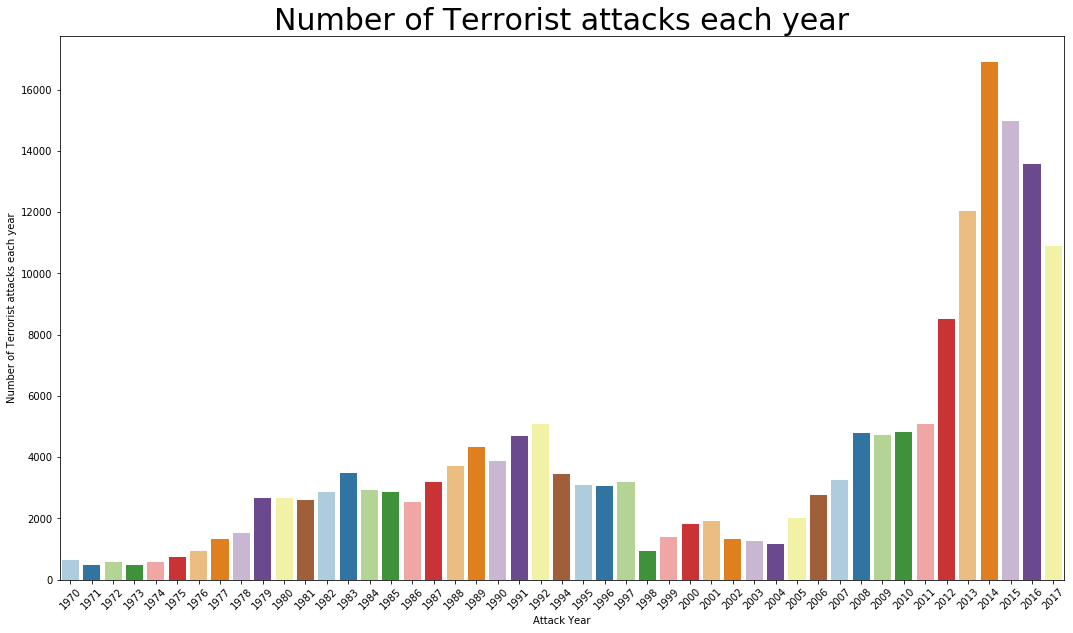

In [10]:
#number of terrorist attacks each year
x= df['iyear'].unique()
y= df['iyear'].value_counts(dropna = True).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x,y,palette = 'Paired')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Terrorist attacks each year')
plt.title('Number of Terrorist attacks each year')
plt.title('Number of Terrorist attacks each year',fontsize=30)
plt.show()

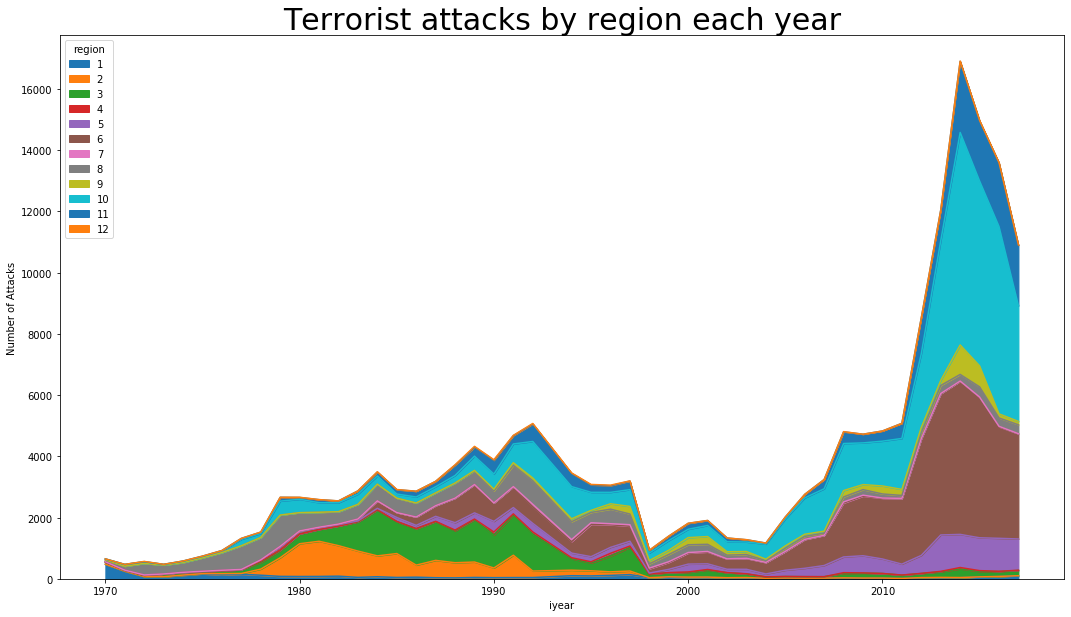

In [11]:
#number of terrorist attacks each year by region
pd.crosstab(df.iyear, df.region).plot(kind='area',figsize=(18,10))
plt.title('Terrorist attacks by region each year')
plt.title('Terrorist attacks by region each year',fontsize=30)
plt.ylabel('Number of Attacks')
plt.show()

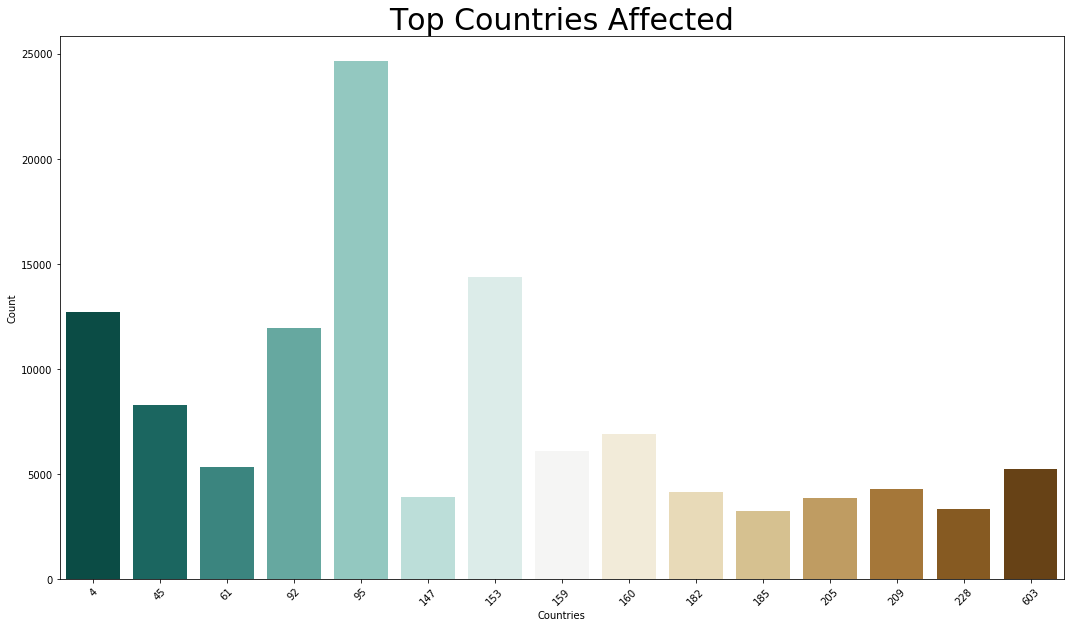

In [12]:
#countires affected by terror attacks
plt.subplots(figsize=(18,10))
sns.barplot(df['country'].value_counts()[:15].index,df['country'].value_counts()[:15].values,palette='BrBG_r')
plt.title('Top Countries Affected')
plt.title('Top Countries Affected',fontsize=30)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

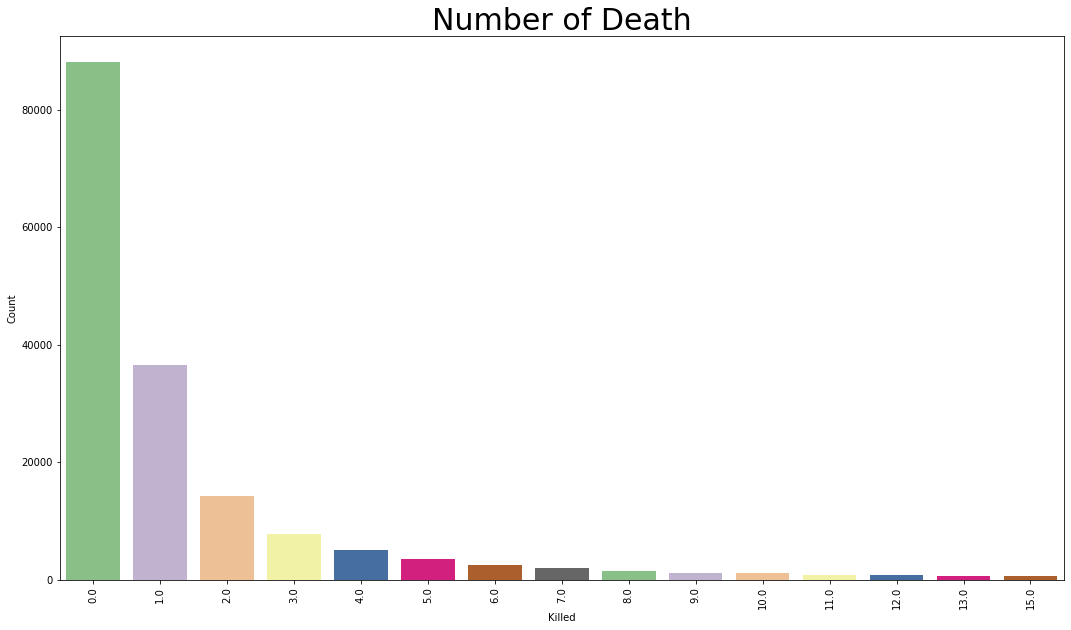

In [13]:
#number of deaths each year
plt.subplots(figsize=(18,10))
sns.barplot(df['nkill'].value_counts()[:15].index,df['nkill'].value_counts()[:15].values,palette='Accent')
plt.title('Number of Death')
plt.title('Number of Death',fontsize=30)
plt.xlabel('Killed')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

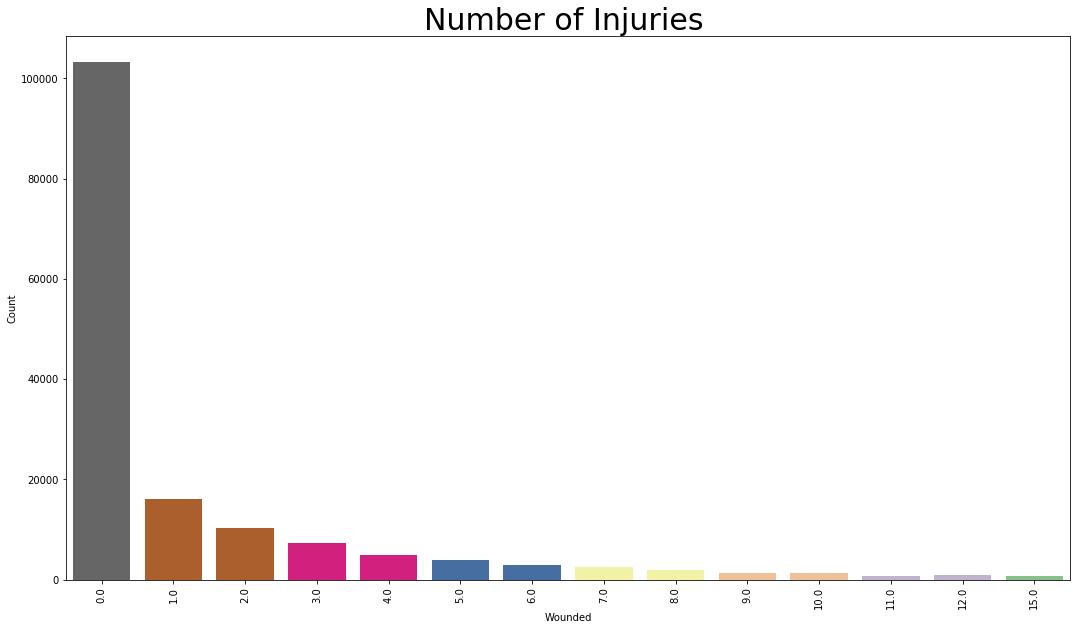

In [14]:
#number of injuries each year
plt.subplots(figsize=(18,10))
sns.barplot(df['nwound'].value_counts()[:15].index,df['nwound'].value_counts()[:15].values,palette='Accent_r')
plt.title('Number of Injuries ')
plt.title('Number of Injuries ',fontsize=30)
plt.xlabel('Wounded')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [20]:
#Total Number of people killed in Terror Attack
killData = df.loc[:,'nkill']
#Drop the NaN values
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


In [24]:
#Look at what types of Attacks these Deaths were made
attackData = df.loc[:,'attacktype1_txt']
#Attack Dataset
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

,attacktype1_txt,nkill
0,Assassination,1.0
1,Hostage Taking (Kidnapping),0.0
2,Assassination,1.0
3,Bombing/Explosion,NaN
4,Facility/Infrastructure Attack,NaN


In [25]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


### Number of killed in Countries 

In [26]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'country']
#CountyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [27]:
countryKillFormatData = countryKillData.pivot_table(columns='country', values='nkill', aggfunc='sum')
countryKillFormatData

country,4,5,6,7,8,10,11,12,14,15,...,428,499,532,603,604,605,1001,1002,1003,1004
nkill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,81.0,2.0,0.0,3410.0,324.0,15.0,3.0,1.0,83.0,2634.0


In [28]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

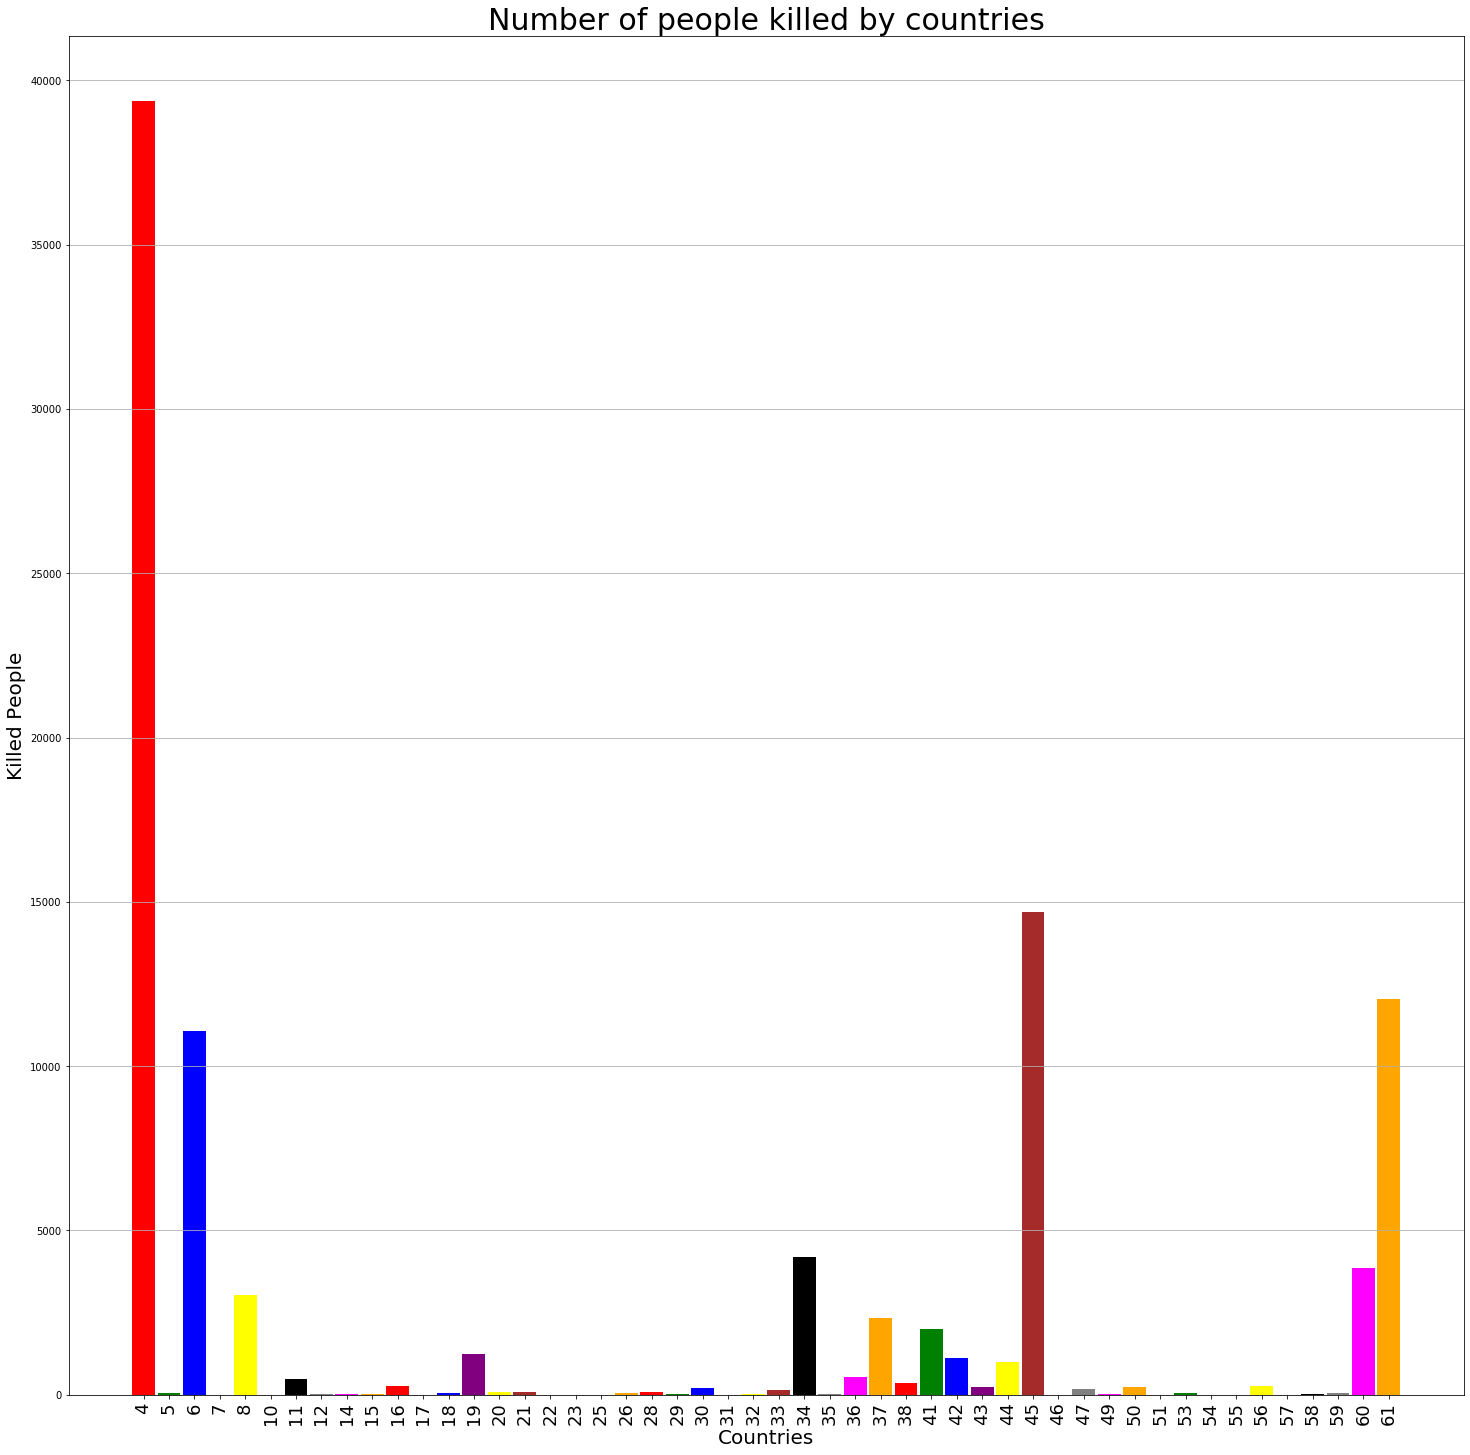

In [29]:
labels = countryKillFormatData.columns.tolist()
#50 Bar provides nice view
labels = labels[:50] 
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values=values[:50]
#Convert float to int
values = [int(i[0]) for i in values] 
#Color list for bar chart bar color 
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 30)
plt.show()

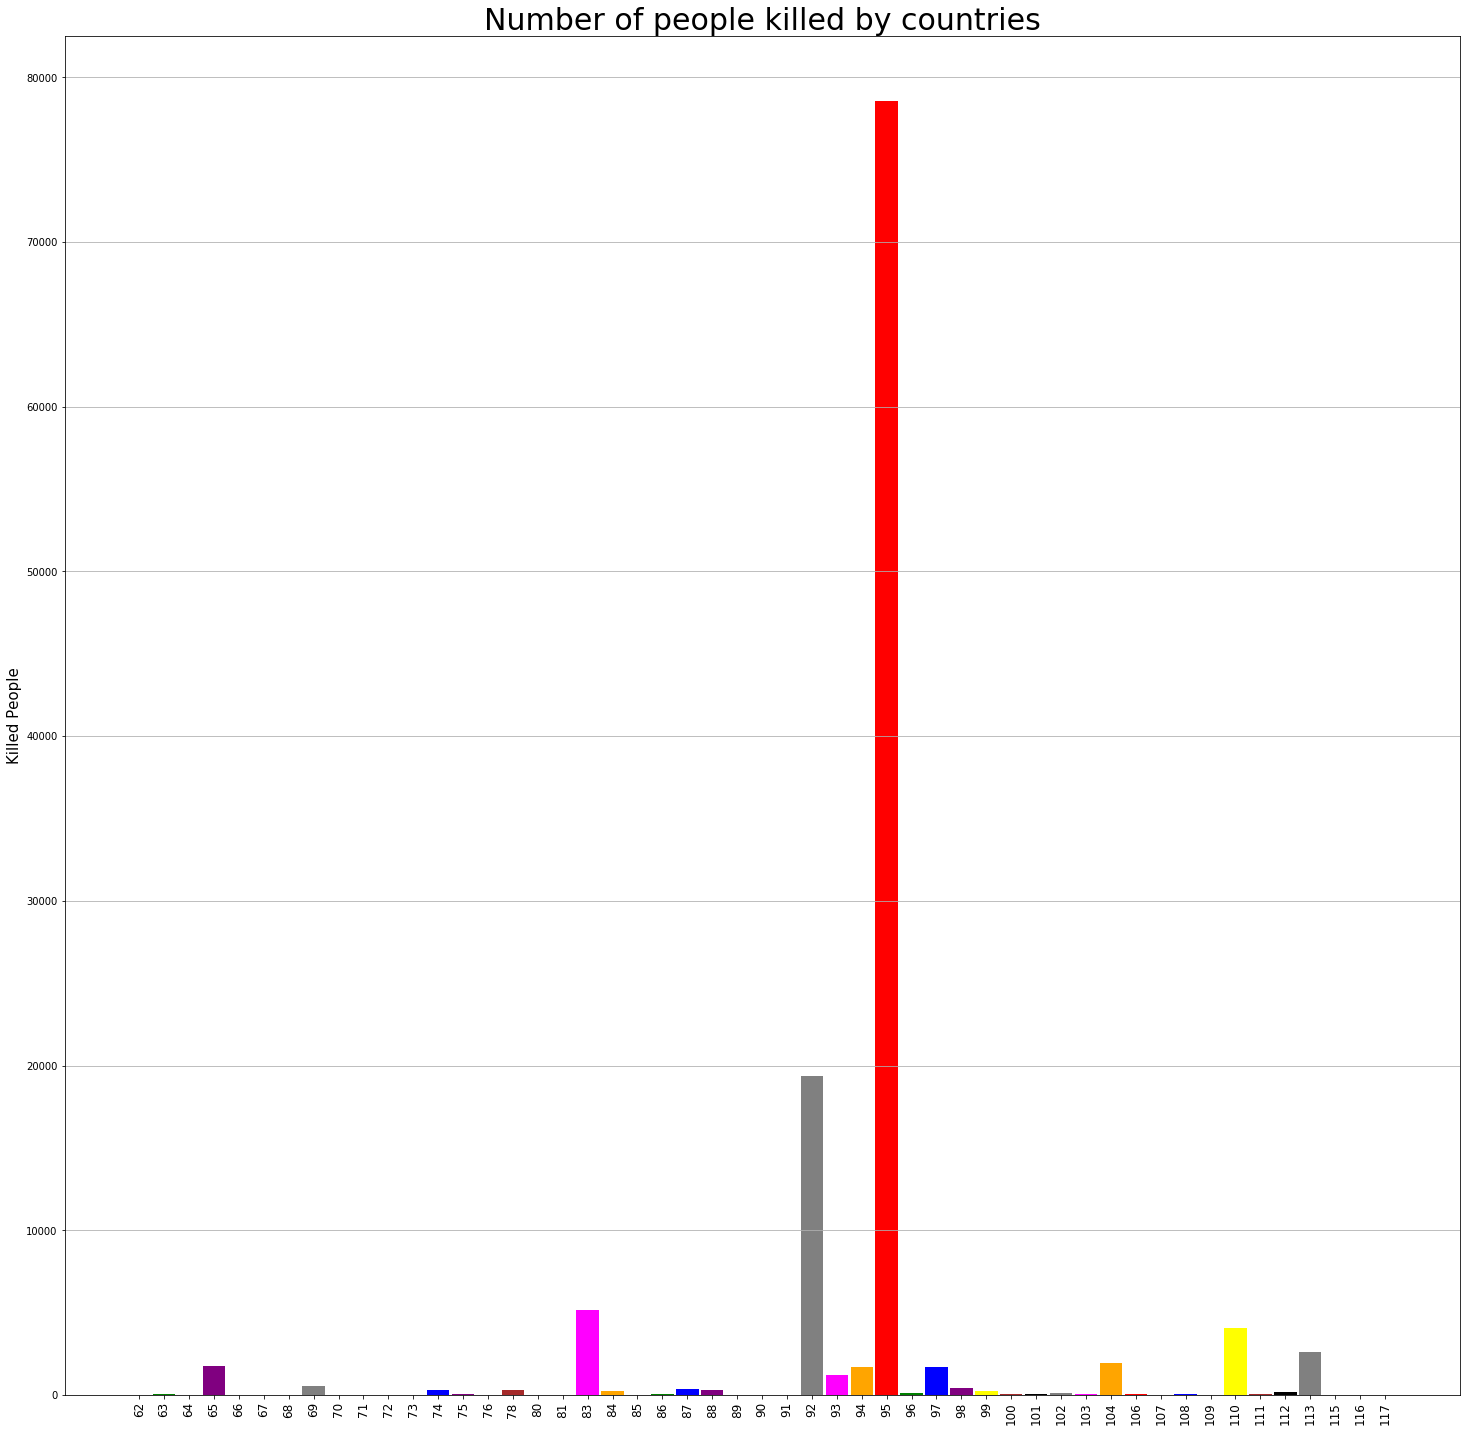

In [30]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries', fontsize = 30)
plt.show()

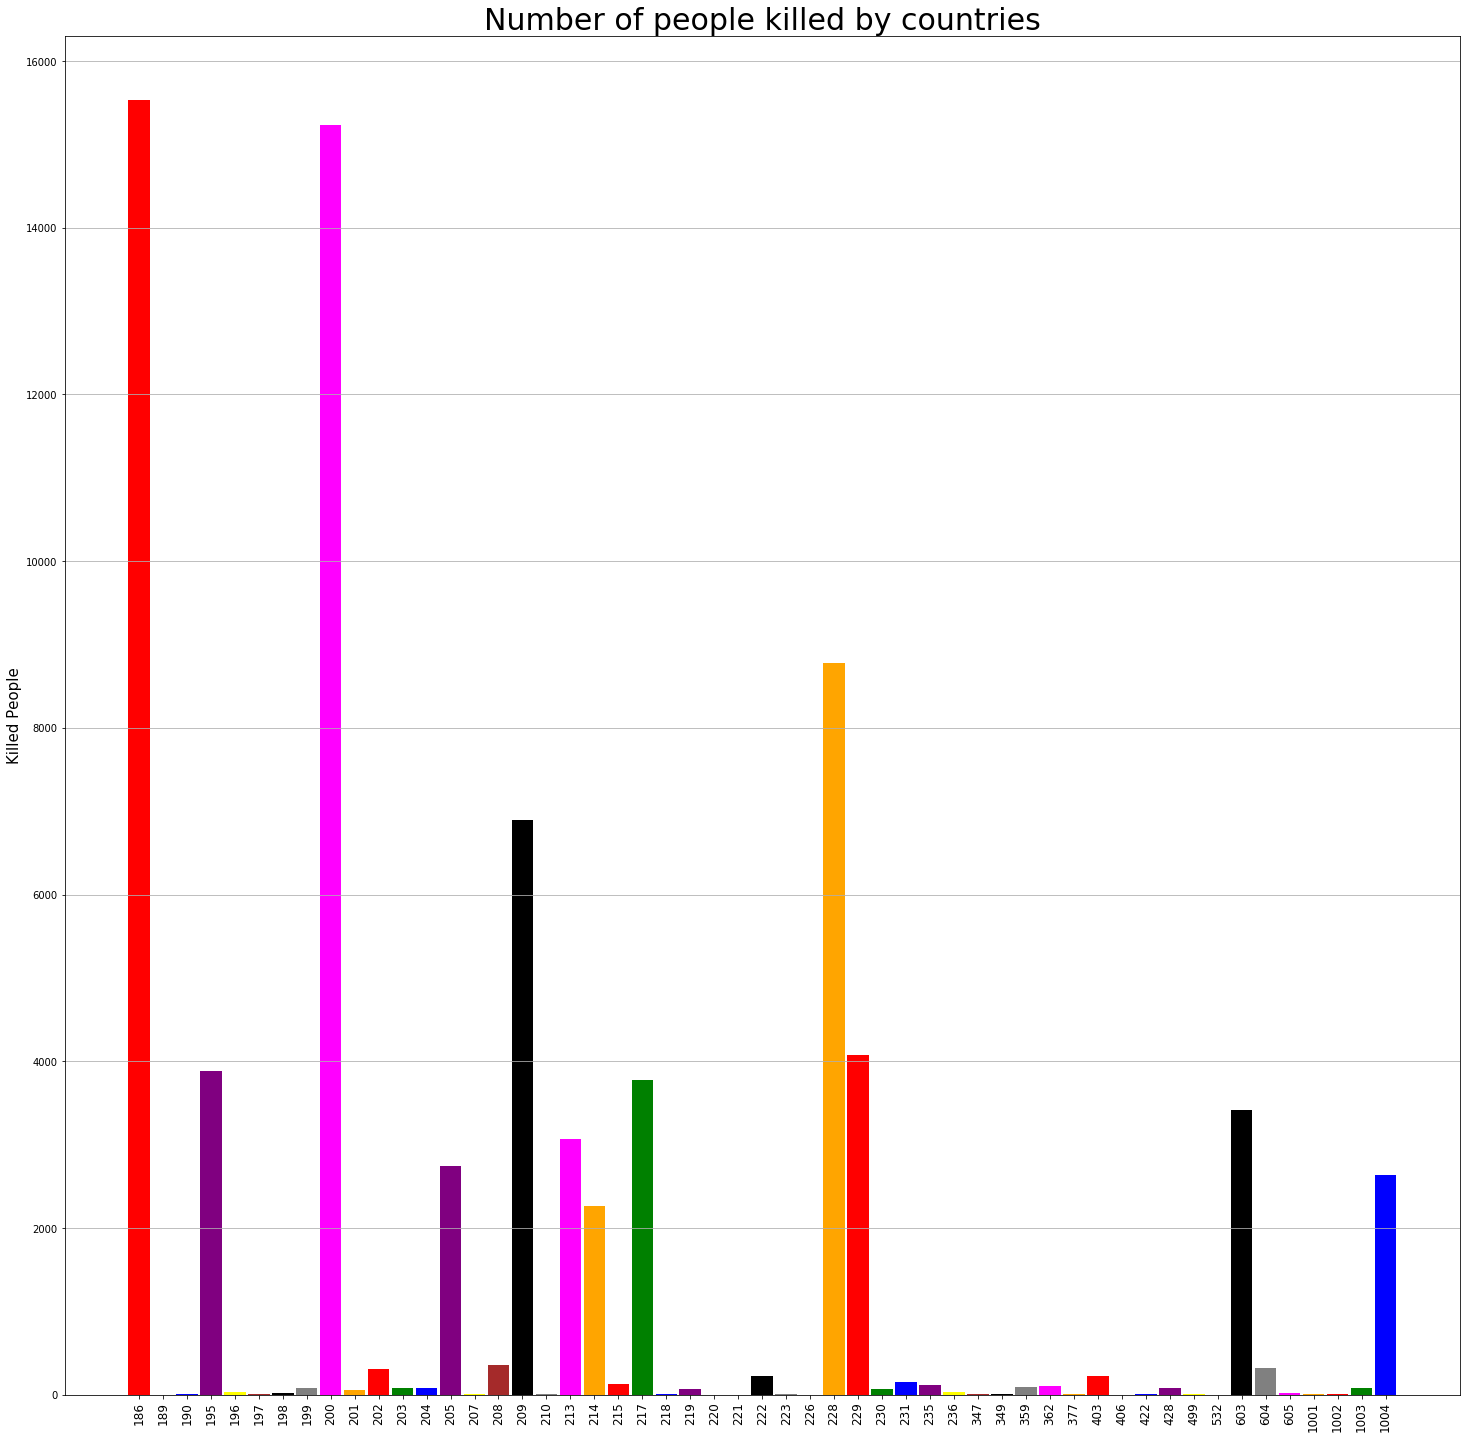

In [31]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries', fontsize = 30)
plt.show()

##### Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.